# Tenis Data Analysis

###### We are going to work with data, so the **very first** thing to do is to understand how to **load** data.

###### Data may come in many many formats - and for sure we are not going to cover all the possible scenarios - only the **most common** ones.

###### To do so, we are going to introduce one of the most important library in the Python Scientific ecosystem: `pandas`.

In [ ]:
import pandas as pd
import numpy as np

### Reading data in CSV

###### The CSV (Comma Separated Values) is one of the most popular format of data:
###### - each column of data is separated by a comma (or other equivalent and specified separator);
###### - the first row of the file may correspond to column headers;
###### - the first column of each row may correspond to values of the `row index`.
###### To read a file in CSV format, `pandas` provide a built-in `read_csv` function
```
##### In this case this should be a good way to cast the columns:
###### Data columns (total 9 columns):
###### #   Column      Non-Null Count  Dtype         
##### ---  ------      --------------  -----         
###### 0   label       353 non-null    int64         
###### 1   reserva     353 non-null    int64         
###### 2   fechayhora  353 non-null    datetime64[ns]
###### 3   ilumina     353 non-null    category      
###### 4   servicio    353 non-null    category      
###### 5   mza-lote    353 non-null    category      
###### 6   casa        353 non-null    string        
###### 7   usuario     353 non-null    category      
###### 8   precio      353 non-null    float64   

In [ ]:
df = pd.read_csv('CanchasDepurado.csv',parse_dates=['fechayhora'], 
        dtype={'ilumina':'category',  'servicio':'category', 'mza-lote':'category', 'casa':'string', 'usuario':'category'})

### Data Set Exploration
###### **First general rule of data analysis**: look at the data!

In [ ]:
pd.set_option('display.max_rows', 10000)  # change presets for data preview
df.head(10000)

###### The file looks ok. The prices are well set in the `Tenis Data Wrangling` step. (Look at the .ipynb)
###### Let's do a review
```

#### Data Set Profile Review

In [ ]:
# see with numpy
type(df)

In [ ]:
# see with pandas method
df.info()

In [ ]:
# Remove label column that it's not necesary
df.drop(['label'], axis=1, inplace =True)

In [ ]:
# Classes per day - resample option
df_cl = df.resample("D", on='fechayhora').count()
df_cl.plot(y='servicio', xlabel='dia', ylabel='cantidad de clases')

In [ ]:
df_cl[df_cl['servicio']>2]

In [ ]:
df_RV_INT = df[df['casa'] == "RV-INT"]
df_RV_INT

In [24]:
# Classes and Income per day - option groupby
# df_cin = df.groupby(['fechayhora']).sum('precio')
df_cin = df.groupby(df['fechayhora'].dt.year)['precio'].agg(['count','sum'])
df_cin

,count,sum
fechayhora,,
2020,16,2540.0
2021,154,21200.0
2022,65,8900.0
2023,118,26100.0


fechayhora
2020     2540.0
2021    21200.0
2022     8900.0
2023    26100.0
Name: sum, dtype: float64

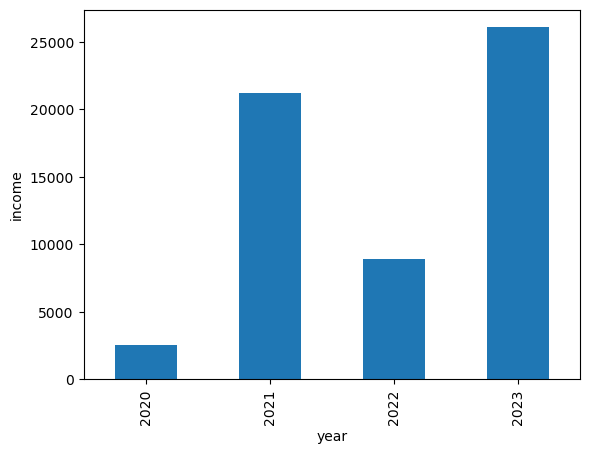

In [92]:
df_cin['sum'].plot.bar(xlabel='year', ylabel='income')
df_cin['sum']

In [93]:
df_cin2 = df_cin.cumsum()
df_cin2

,count,sum
fechayhora,,
2020,16,2540.0
2021,170,23740.0
2022,235,32640.0
2023,353,58740.0


<Axes: xlabel='year', ylabel='acumulated income'>

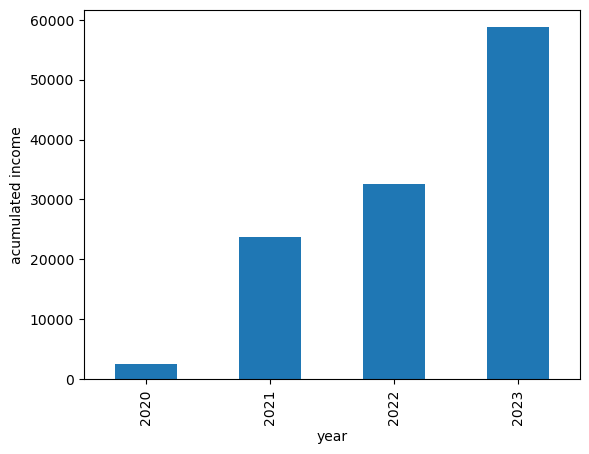

In [94]:
df_cin2['sum'].plot.bar(xlabel='year', ylabel='acumulated income')

fechayhora
2020     16
2021    154
2022     65
2023    118
Name: count, dtype: int64

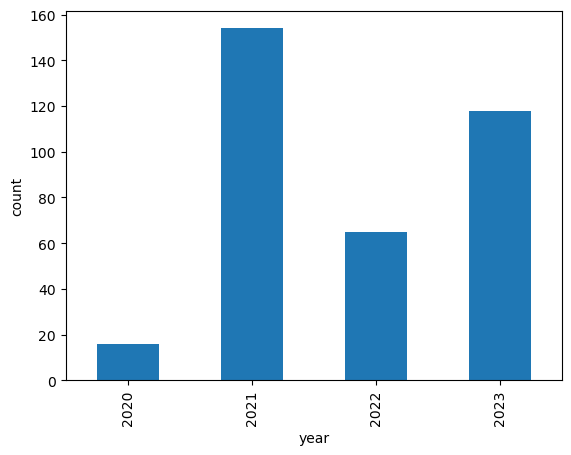

In [95]:
df_cin['count'].plot.bar(xlabel='year', ylabel='count')
df_cin['count']

In [96]:
df.head()

,reserva,fechayhora,ilumina,servicio,mza-lote,casa,usuario,precio,dayofw
0,1652644,2020-11-26 16:00:00,SOL,Cancha 1,APROBADA,N-09,Propietario,90.0,3
1,1687243,2020-12-02 18:00:00,LUZ,Cancha 1,APROBADA,M-03,Invitado,190.0,2
2,1687608,2020-12-02 19:00:00,LUZ,Cancha 2,APROBADA,H-07,Invitado,190.0,2
3,1712222,2020-12-04 17:00:00,SOL,Cancha 1,APROBADA,E-08,Invitado,90.0,4
4,1712511,2020-12-04 18:00:00,LUZ,Cancha 1,APROBADA,PRUEBA,Propietario,190.0,4


In [129]:
df['dayofw']=df['fechayhora'].dt.dayofweek
df_dow = df['dayofw']

In [130]:
df_do_w = df.groupby('dayofw').count()
df_do_w.columns

Index(['reserva ', 'fechayhora', 'ilumina', 'servicio', 'mza-lote', 'casa',
       'usuario', 'precio'],
      dtype='object')

In [ ]:
df_do_w.drop(['reserva ', 'fechayhora', 'ilumina', 'servicio', 'casa',
       'usuario', 'precio'], axis=1, inplace=True)

In [134]:
df_do_w.rename(columns={'mza-lote': 'classes'}, inplace=True)
df_do_w['dayname'] = ['mon', 'tues', 'wed', 'thu', 'fry', 'sat', 'sun']

In [135]:
df_do_w

,classes,dayname
dayofw,,
0,51,mon
1,48,tues
2,45,wed
3,27,thu
4,62,fry
5,81,sat
6,39,sun


<Axes: xlabel='dayname'>

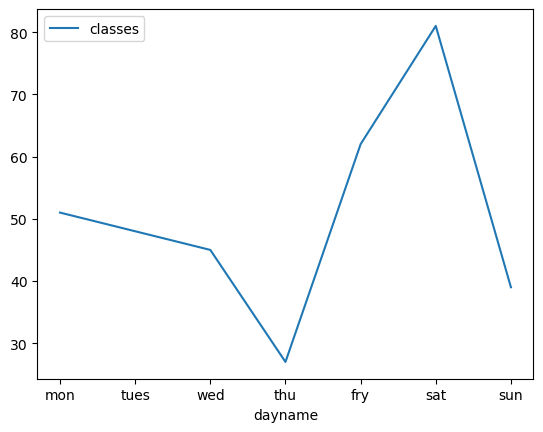

In [137]:
df_do_w.plot(x='dayname')

In [172]:
# Count how many classes per hour
# df.groupby(df['fechayhora'].dt.dayofweek).all()
df2= df.groupby(df['fechayhora'].dt.dayofweek)['fechayhora']

In [192]:
df

,reserva,fechayhora,ilumina,servicio,mza-lote,casa,usuario,precio,dayofw,clastime
0,1652644,2020-11-26 16:00:00,SOL,Cancha 1,APROBADA,N-09,Propietario,90.0,3,16
1,1687243,2020-12-02 18:00:00,LUZ,Cancha 1,APROBADA,M-03,Invitado,190.0,2,18
2,1687608,2020-12-02 19:00:00,LUZ,Cancha 2,APROBADA,H-07,Invitado,190.0,2,19
3,1712222,2020-12-04 17:00:00,SOL,Cancha 1,APROBADA,E-08,Invitado,90.0,4,17
4,1712511,2020-12-04 18:00:00,LUZ,Cancha 1,APROBADA,PRUEBA,Propietario,190.0,4,18
5,1726220,2020-12-07 10:00:00,SOL,Cancha 1,APROBADA,D-02,Propietario,90.0,0,10
6,1726498,2020-12-07 12:00:00,SOL,Cancha 2,APROBADA,G-15,Propietario,90.0,0,12
7,1770558,2020-12-12 19:00:00,LUZ,Cancha 1,APROBADA,G-15,Invitado,190.0,5,19
8,1777094,2020-12-14 19:00:00,LUZ,Cancha 1,APROBADA,D-02,Propietario,190.0,0,19
9,1813366,2020-12-18 18:00:00,LUZ,Cancha 1,APROBADA,M-01,Invitado,190.0,4,18


In [191]:
df.groupby([df['dayofw'], df['clastime']])['casa'].count()

dayofw  clastime
0       9            1
        10           3
        11           2
        12           2
        14           1
        15          12
        16           1
        17           5
        18          14
        19           8
        20           2
1       8            2
        10           1
        11           3
        12           3
        13           2
        14           2
        15           9
        16           3
        17           4
        18           5
        19           9
        20           5
2       8            1
        9            7
        10           1
        11           1
        15           9
        16           4
        17           5
        18           8
        19           4
        20           5
3       9            1
        12           2
        14           1
        15           2
        16           2
        17           2
        18           9
        19           4
        20           4
4       9        